# COGS 189 Analysis

In [90]:
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd

from scipy.io.wavfile import read

import os
import mne

import wave
import sys

In [91]:
# Remove analysis files from previous run
if(os.path.exists("out.txt")):
    os.remove("out.txt")
if(os.path.exists("out.csv")):
    os.remove("out.csv")

In [92]:
filename = "OpenBCI-RAW-2023-02-28_16-28-56.txt"
filename = "OpenBCI-RAW-2023-02-28_16-30-10.txt"

with open("../data/OpenBCISession_2023-02-28_16-27-31/" + filename, "r") as f:
    with open("out.txt", "w") as o:
        for line in f:
            if(line.startswith("S")): # this is the header
                print(line)
                line = (line.replace(" ", "")).replace("Channel", "") # good find!
                o.write(line)
            elif("%" not in line):
                o.write(line)
            else: # these would have %
                print(line) # printing these just to visually inspect

os.rename("out.txt", "out.csv")

%OpenBCI Raw EEG Data

%Number of channels = 8

%Sample Rate = 250 Hz

%Board = OpenBCI_GUI$BoardCytonSerial

Sample Index, EXG Channel 0, EXG Channel 1, EXG Channel 2, EXG Channel 3, EXG Channel 4, EXG Channel 5, EXG Channel 6, EXG Channel 7, Accel Channel 0, Accel Channel 1, Accel Channel 2, Other, Other, Other, Other, Other, Other, Other, Analog Channel 0, Analog Channel 1, Analog Channel 2, Timestamp, Other, Timestamp (Formatted)



In [93]:
data = pd.read_csv("out.csv")
data.head()

,SampleIndex,EXG0,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,Accel0,...,Other.3,Other.4,Other.5,Other.6,Analog0,Analog1,Analog2,Timestamp,Other.7,Timestamp(Formatted)
0,27.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,236.0,1.0,255.0,315.0,236.0,511.0,1.677631e+09,0.0,2023-02-28 16:30:10.619
1,28.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,236.0,1.0,254.0,315.0,236.0,510.0,1.677631e+09,0.0,2023-02-28 16:30:10.619
2,29.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,236.0,1.0,254.0,315.0,236.0,510.0,1.677631e+09,0.0,2023-02-28 16:30:10.619
3,30.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,236.0,1.0,255.0,315.0,236.0,511.0,1.677631e+09,0.0,2023-02-28 16:30:10.619
4,31.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.0,...,0.0,236.0,1.0,255.0,316.0,236.0,511.0,1.677631e+09,0.0,2023-02-28 16:30:10.619


# Import data for all subjects
Combine data from all subjects for a selected experiment into a single data frame.

In [94]:
from glob import glob

# Specify experiment folder to read from
exp = 'exp0'

# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Container for combining data from multiple files
data = pd.DataFrame()

# Subject ID here essentially tracks the file 
subject_ID = 0
for file_path in data_files:
    print(f'Reading {file_path}...')
    
    # Read in one subject's data
    sub_data = pd.read_csv(file_path,
                       delimiter = ',', # BrainFlow files appear to use \t
                       header=4, # row number of col names
                      )
    
    # Append a column with the subject ID (really just a proxy for the file path)
    sub_data['Subject'] = subject_ID
    
    # Concatenate into one dataframe with all files
    data = pd.concat([data, sub_data])
    
    # Increment subject_ID
    subject_ID += 1
    
data

Reading ../data/exp0/OpenBCISession_2023-03-01_13-30-42/OpenBCI-RAW-2023-03-01_13-43-06.txt...
Reading ../data/exp0/OpenBCISession_2023-03-01_14-47-58/OpenBCI-RAW-2023-03-01_14-54-00.txt...


,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted),Subject
0,1.0,12584.725032,15524.024132,-2317.138292,17950.261289,14667.952319,7234.834997,18205.361748,19735.338656,0.0,...,109.0,1.0,255.0,421.0,621.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
1,2.0,12595.587980,15529.410902,-2316.959478,17958.352620,14691.756927,7232.622174,18216.045882,19740.792482,0.0,...,4.0,1.0,255.0,402.0,516.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
2,3.0,12579.830000,15523.957077,-2315.327801,17950.641269,14672.221502,7231.638698,18202.008987,19733.751682,0.0,...,189.0,1.0,255.0,387.0,445.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,255.0,445.0,768.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.669,0
4,1.0,12535.305325,15492.910503,-2324.290851,17940.381818,14577.673623,7226.006058,18228.495804,19714.976217,0.0,...,110.0,1.0,255.0,423.0,622.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242135,210.0,7036.999707,4885.376082,1318.797626,16461.232777,16553.768999,12348.936480,9420.030942,11067.108639,0.0,...,246.0,1.0,255.0,317.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.698,1
242136,211.0,7035.949175,4888.594733,1317.478873,16470.285233,16557.144112,12341.113370,9446.115428,11038.543110,0.0,...,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.706,1
242137,212.0,7032.864634,4901.268172,1316.942432,16462.372716,16539.441531,12340.018134,9420.545032,11021.645191,0.0,...,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.706,1
242138,213.0,7031.389419,4913.941612,1316.718914,16468.988832,16534.524147,12334.944288,9389.543163,11007.742406,0.0,...,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.722,1


# Simplify Column Names

In [95]:
print(data.keys())

# Remove extra spaces from col names, and remove "Channel" as its redundant
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
data = data.rename(columns=lambda x: x.strip().replace(" Channel ", ""))

print(data.keys())

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)', 'Subject'],
      dtype='object')
Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2',
       'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Analog0', 'Analog1',
       'Analog2', 'Timestamp', 'Other.7', 'Timestamp (Formatted)', 'Subject'],
      dtype='object')


In [96]:
#testing channel values
print("Count # of non-zero entries:")

print("Accel0 Size: " + str(len(data.loc[data['Accel0'] != 0])))
print("Accel1 Size: " + str(len(data.loc[data['Accel1'] != 0])))
print("Accel2 Size: " + str(len(data.loc[data['Accel2'] != 0])))

print()

print("Analog0 Size: " + str(len(data.loc[data['Analog0'] != 0])))
print("Analog1 Size: " + str(len(data.loc[data['Analog1'] != 0])))
print("Analog2 Size: " + str(len(data.loc[data['Analog2'] != 0])))

Count # of non-zero entries:
Accel0 Size: 0
Accel1 Size: 0
Accel2 Size: 0

Analog0 Size: 443848
Analog1 Size: 443848
Analog2 Size: 443848


# Drop unused columns

In [97]:
# data = data.drop(columns=['temp', 'time0'])
#data = data.drop(columns=['temp', 'time0', 'time1'])

drop_cols = [] # list of column labels to drop
for col in data.keys():
    # print(col)
    if 'Other' in col:
        drop_cols.append(col)
    elif 'Accel' in col:
        drop_cols.append(col)
    elif 'Timestamp (Formatted)' in col:
        drop_cols.append(col)
        
print('Columns to drop:', drop_cols)

# Remove 
data = data.drop(columns=drop_cols)

print('Remaining cols:\n', data.keys())

Columns to drop: ['Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Other.7', 'Timestamp (Formatted)']
Remaining cols:
 Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Analog0', 'Analog1', 'Analog2', 'Timestamp', 'Subject'],
      dtype='object')


In [98]:
if 0: # skip for now, as additional cols could be added during analysis.
    # also skip transposing for now
    data = data[['EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 
                 'Analog0', 'Analog1', 'Analog2', 'Timestamp']]

    data = data.T
    data

# Plot Analog (Aux) Channels

/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_27534/1777783613.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(f"{col} Min: {data[col][START_NDX:].min()}")
/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_27534/1777783613.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(f"{col} Max: {data[col][START_NDX:].max()}")
/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_27534/1777783613.py:12: FutureWarning: The behavior of `series[i:j]

Analog0 Min: 245.0
Analog0 Max: 448.0
Analog1 Min: 201.0
Analog1 Max: 649.0
Analog2 Min: 284.0
Analog2 Max: 764.0


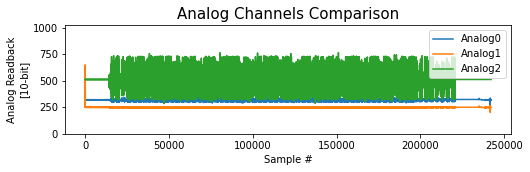

In [99]:
START_NDX = 100 # why skip initial samples?

# Make a figure to plot all analog data
plt.figure(figsize=(8,2))

for col in data.keys():
    if 'Analog' in col:
        print(f"{col} Min: {data[col][START_NDX:].min()}")
        print(f"{col} Max: {data[col][START_NDX:].max()}")
        
        # add a plot for this channel
        plt.plot(data[col][START_NDX:], label=col)


plt.title("Analog Channels Comparison", fontsize=15)
plt.legend(loc="upper right")
plt.xlabel('Sample #')
plt.ylabel('Analog Readback\n[10-bit]')
plt.ylim([0, 1023])
plt.show()

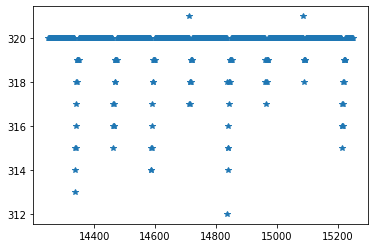

In [100]:
START_NDX = 14250
DURATION_NDX = 250*4
analog_window = data['Analog0'].iloc[START_NDX:START_NDX + DURATION_NDX]
plt.plot(analog_window, '*')

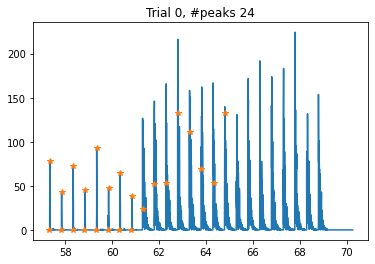

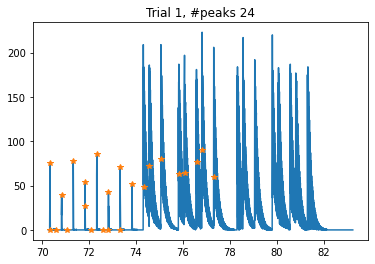

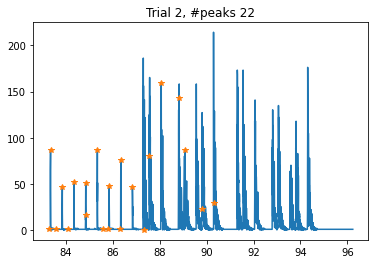

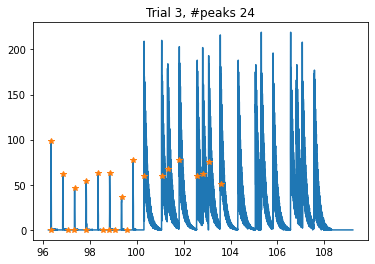

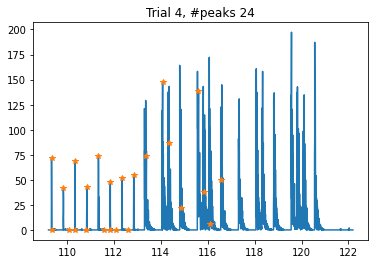

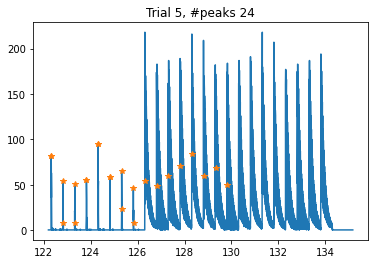

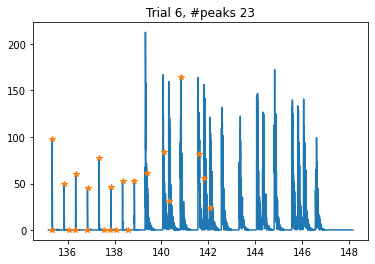

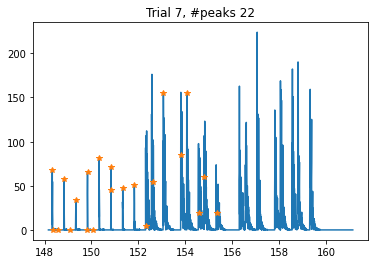

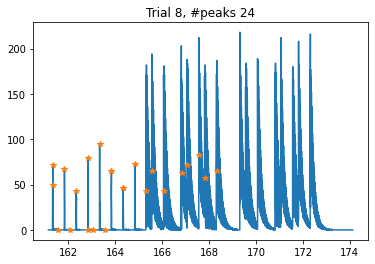

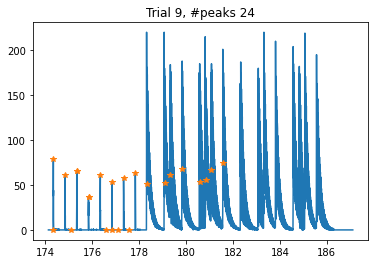

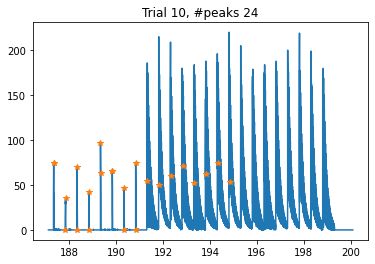

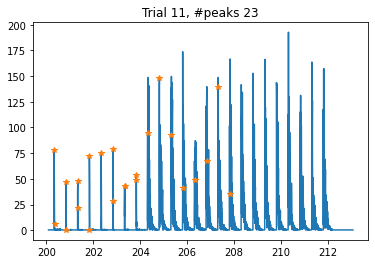

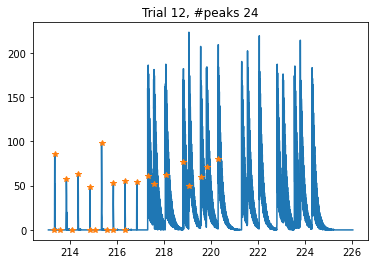

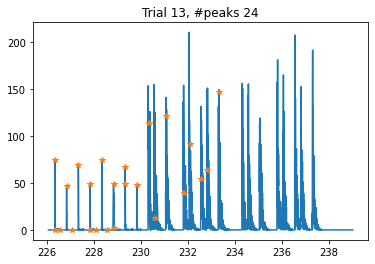

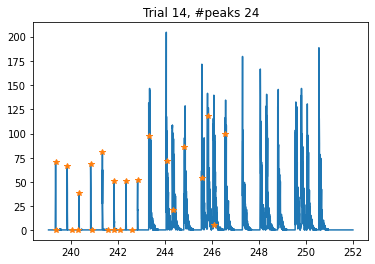

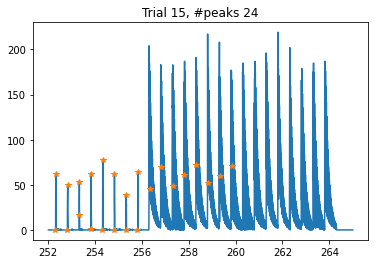

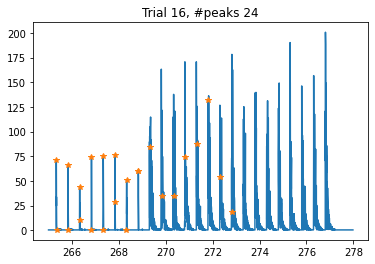

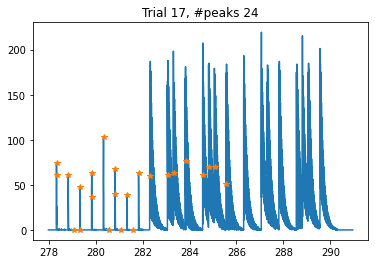

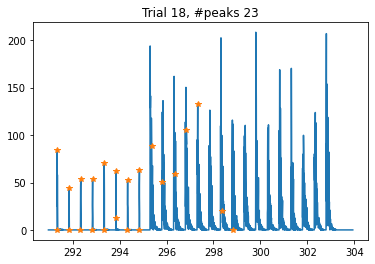

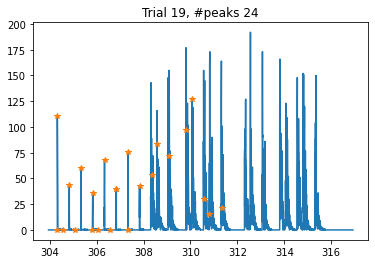

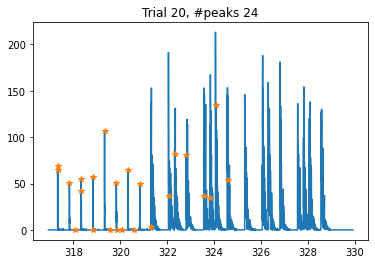

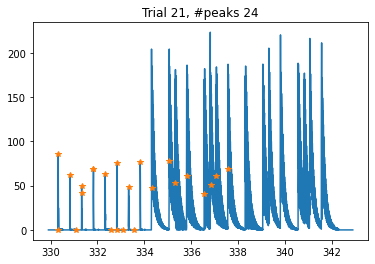

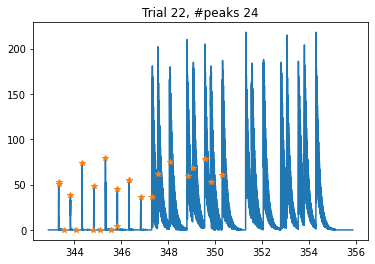

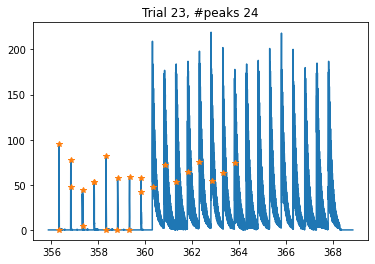

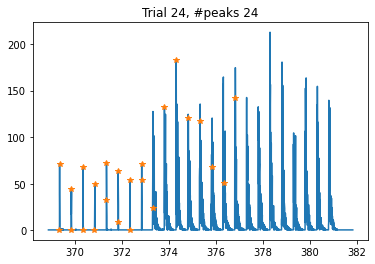

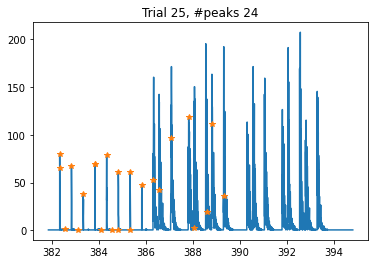

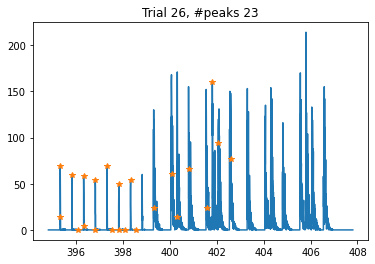

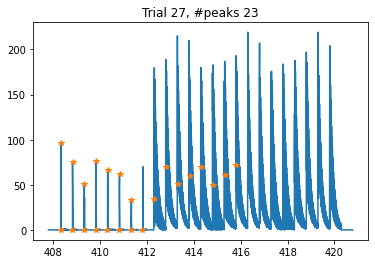

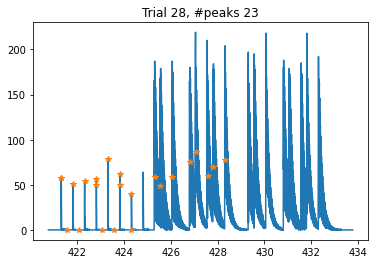

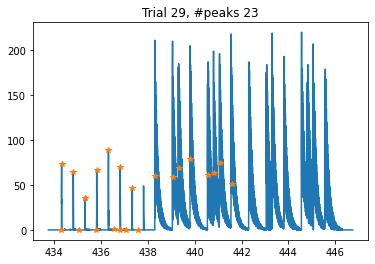

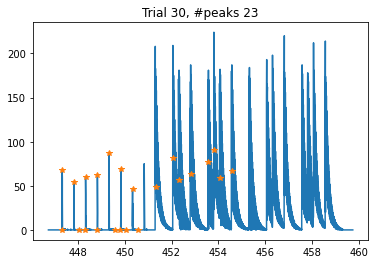

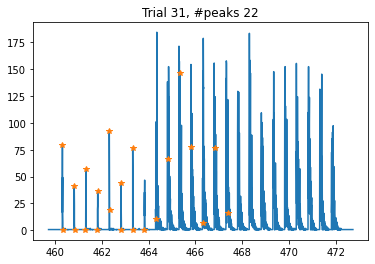

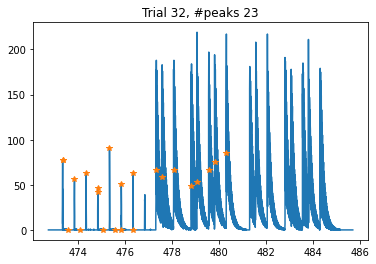

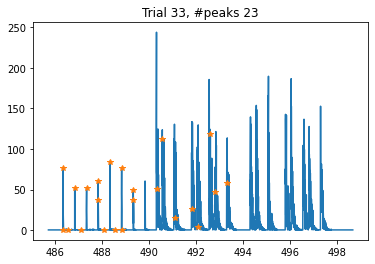

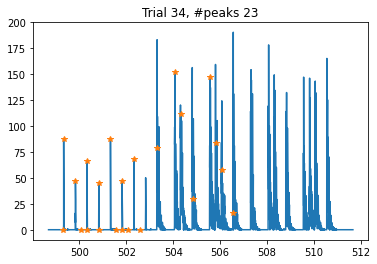

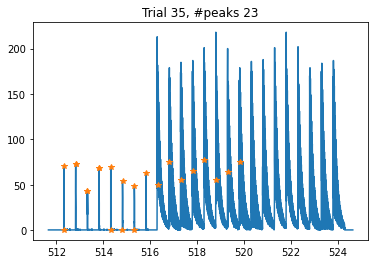

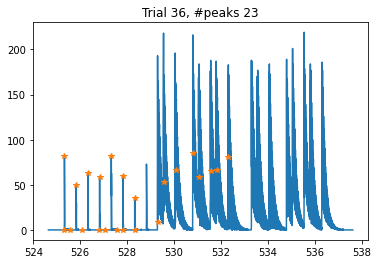

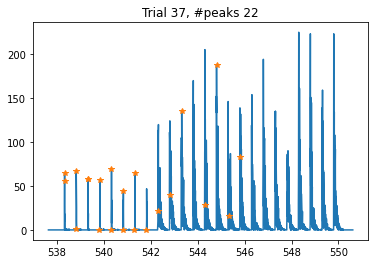

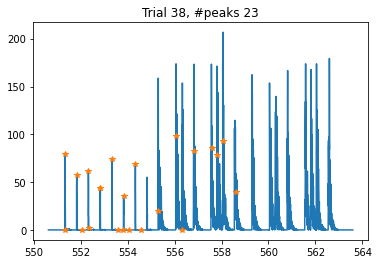

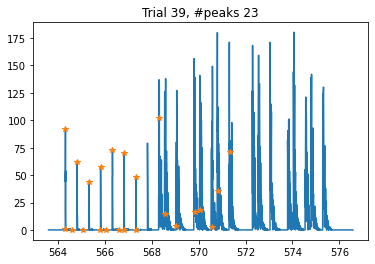

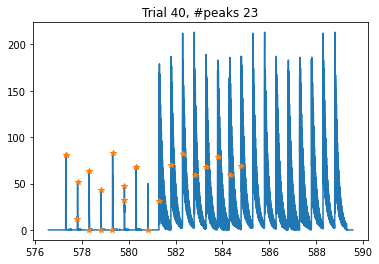

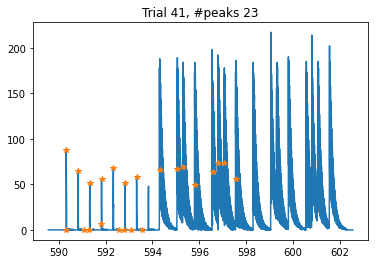

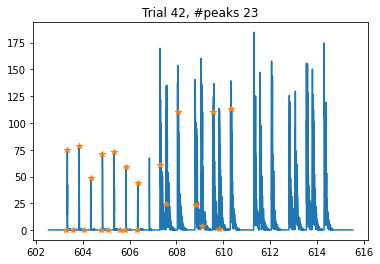

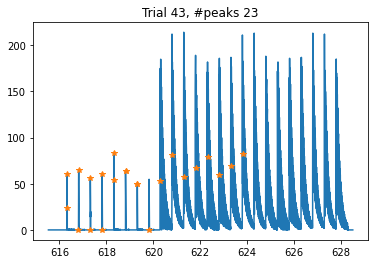

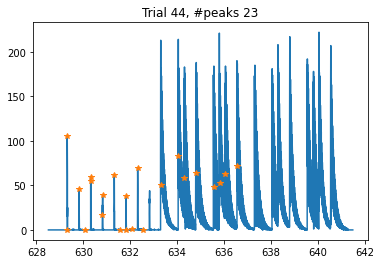

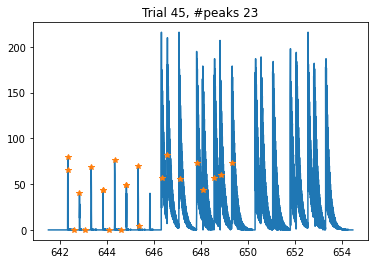

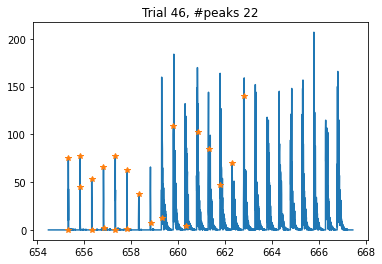

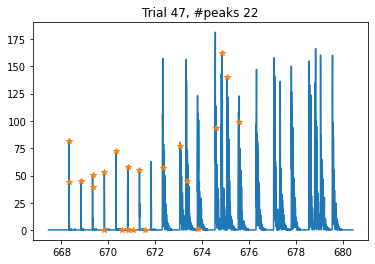

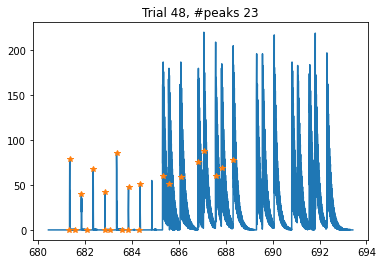

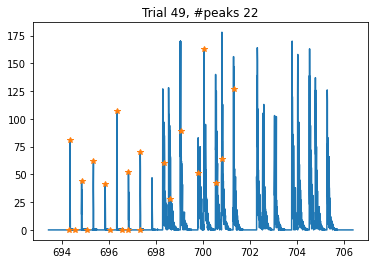

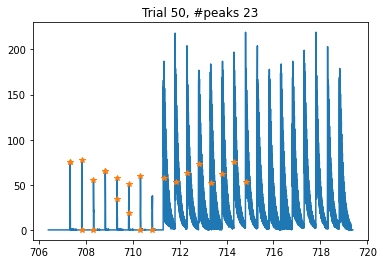

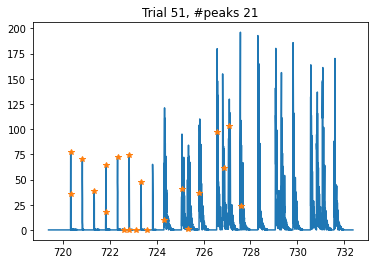

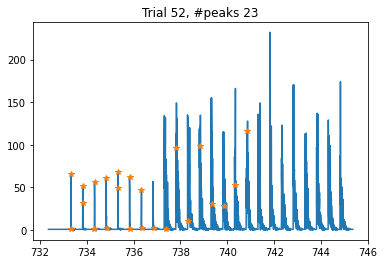

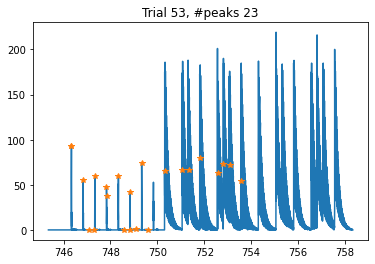

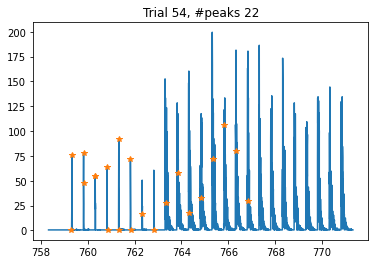

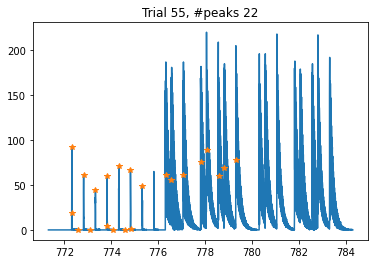

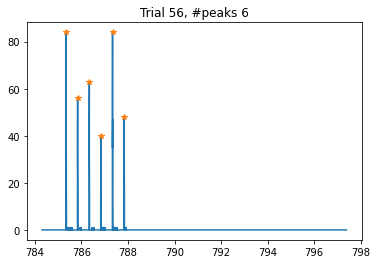

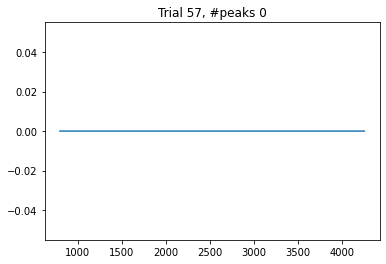

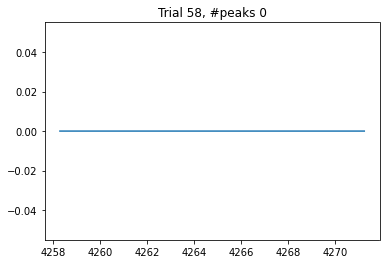

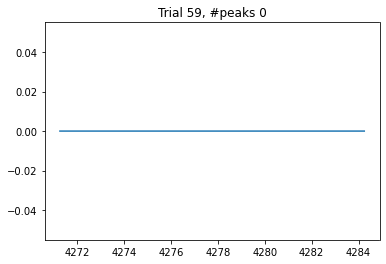

In [117]:
# Find onsets (peaks)
from scipy.signal import find_peaks
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

fs_eeg = 250

NUM_TRIALS = 2 * 3 * 10
START_NDX = 14320
DURATION_NDX = int(250*(4+8+1))

for trial in range(NUM_TRIALS):
    
    t = data['Timestamp'].iloc[START_NDX:START_NDX + DURATION_NDX]
    t = np.array(t)
    t -= data['Timestamp'].iloc[0] # starting time stamp


    analog2 = data['Analog2'].iloc[START_NDX:START_NDX + DURATION_NDX]
    analog2 = np.array(analog2)
    analog2 = analog2 - analog2.mean()
    analog2 = np.abs(analog2)

    plt.figure()
    plt.plot(t, analog2, '-')

    cue = analog2[:fs_eeg*4] # first four seconds is the metronome
    peaks_cue, _ = find_peaks(
        cue, # only use one of the two channels
        height=20, # the smaller metronome blips also exceed 0.5
        distance=fs_eeg*0.2, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    drums = analog2[fs_eeg*4:]
    peaks_drums, _ = find_peaks(
        drums, # only use one of the two channels
        height=100, # the smaller metronome blips also exceed 0.5
        distance=fs_eeg*0.2, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )

    peaks = []
    peaks.extend(peaks_cue)
    peaks.extend(peaks_drums)
    
    plt.plot(t[peaks], analog2[peaks], '*')
    
    START_NDX += DURATION_NDX
    
    plt.title(f'Trial {trial}, #peaks {len(peaks)}')
    plt.show()

In [85]:
data['Timestamp'].iloc[0]

1677706986.580796

# Import PsychoPy Logs

In [ ]:
# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Container for combining data from multiple files
data = pd.DataFrame()

# Subject ID here essentially tracks the file 
subject_ID = 0
for file_path in data_files:
    print(f'Reading {file_path}...')
    
    # Read in one subject's data
    sub_data = pd.read_csv(file_path,
                       delimiter = ',', # BrainFlow files appear to use \t
                       header=4, # row number of col names
                      )
    
    # Append a column with the subject ID (really just a proxy for the file path)
    sub_data['Subject'] = subject_ID
    
    # Concatenate into one dataframe with all files
    data = pd.concat([data, sub_data])
    
    # Increment subject_ID
    subject_ID += 1
    
data

# Compare peak times between sampling rates

In [ ]:
# Find onsets (peaks)
from scipy.signal import find_peaks
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

peaks, _ = find_peaks(
    np.abs(y), # only use one of the two channels
    height=0.5, # the smaller metronome blips also exceed 0.5
    distance=fs_stim*0.1, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
)
print(len(peaks))

peaks_rs, _ = find_peaks(
    np.abs(y_rs), # only use one of the two channels
    height=0.25, # the smaller metronome blips also exceed 0.5
    distance=fs_eeg*0.1, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
)
print(len(peaks_rs))

plt.figure()
plt.plot(t[peaks], y[peaks], '*')
plt.plot(t_rs[peaks_rs], y_rs[peaks_rs], '*')

plt.figure()
t_error = t[peaks]-t_rs[peaks_rs]
plt.plot(t_error, '*')
plt.xlabel('Peak #')
plt.ylabel('Timing Error [s]')

In [ ]:
corr = np.correlate(data.T['Analog2'] - np.mean(data.T['Analog2']), 
                    sig - np.mean(sig),
                    mode='full')

corr

In [ ]:
sampleRate = 250.0
sfreq = 1000
ch_types = []
ch_names = []

num_channels = data.shape[0]
num_eeg = 8
num_aux = 3
num_time = 1
eeg_channel = "eeg"
aux_channel = "stim" #change
time_channel = "misc" #change

for i in range(num_eeg):
    ch_types.append(eeg_channel)
for i in range(num_aux):
    ch_types.append(aux_channel)
for i in range(num_time):
    ch_types.append(time_channel)  

info = mne.create_info(ch_names=list(data.index), sfreq=sfreq, ch_types=ch_types)

In [ ]:
raw = mne.io.RawArray(data, info)
raw

In [ ]:
scalings = {'eeg': 2, 'bio': 1, 'time': 1}

raw.plot(n_channels=11, scalings=scalings, title='test',
         show=True, block=True)


raw.compute_psd().plot(average = False)